In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import cv2

In [2]:
DATADIR = 'E:/AI/Pediatric Chest X-ray Pneumonia/train'
CATEGORIES = ['NORMAL','PNEUMONIA']

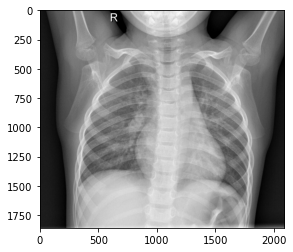

In [3]:
for category in CATEGORIES:
    path = os.path.join(DATADIR,category) # path to pneumonia & normal dir
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap='gray')
        plt.show()
        break
    break    

In [4]:
print(img_array.shape)

(1858, 2090)


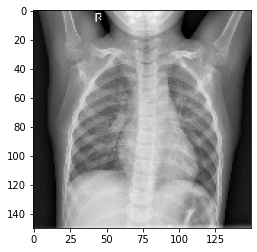

In [10]:
IMG_SIZE = 150

new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap='gray')
plt.show()

In [11]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category) # path to pneumonia & normal dir
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
            

create_training_data()


In [12]:
print(len(training_data))

5232


In [13]:
import random

random.shuffle(training_data)

In [14]:
X = []
y = []

In [15]:
for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1 , IMG_SIZE,IMG_SIZE , 1)

In [16]:
import pickle

pickle_out = open('F.pickle' , 'wb')
pickle.dump(X , pickle_out)
pickle_out.close()

pickle_out = open('l.pickle' , 'wb')
pickle.dump(y , pickle_out)
pickle_out.close()

In [17]:
pickle_in = open('F.pickle','rb')
X = pickle.load(pickle_in)

print(len(X))

5232
